 IMPORTING MODULES

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


UPLOADING THE DATASET

In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving spam.csv to spam.csv


READING THE DATASET

In [ ]:
#df=pd.read_csv('spam.csv')
#df = pd.read_csv('spam.csv', encoding='utf-8', errors='replace')
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df = df[['v2','v1']]
df.rename(columns={'v2':'messages','v1':'label'},inplace=True)
df.head()

<ipython-input-9-910a0c208a65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v2':'messages','v1':'label'},inplace=True)


,messages,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(5169, 2)

In [ ]:
#check for null values
df.isnull().sum()

messages    0
label       0
dtype: int64

In [ ]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

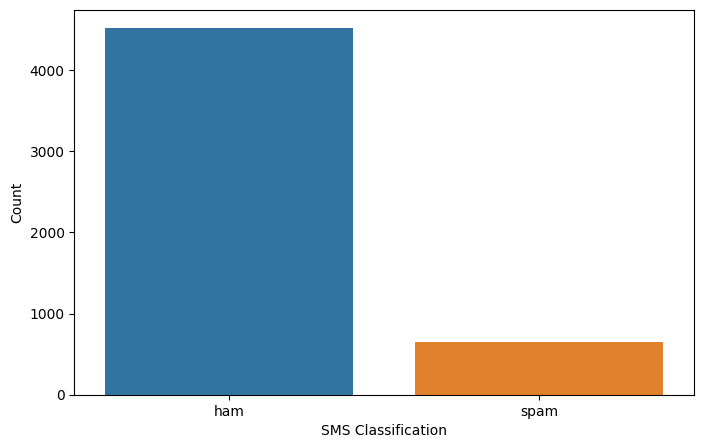

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

CLEANING THE DATA

In [ ]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
  #convert to lowercase
  text = text.lower()
  #remove special characters
  text = re.sub(r'^0-9a-zA-z',' ',text)
  #remove extra spaces
  text = re.sub(r'\s+',' ',text)
  #remove stopwords
  text = " ".join(word for word in text.split() if word not in stop_words)
  return text

In [ ]:
#clean the message
df['clean_text']=df['messages'].apply(clean_text)
df.head()

,messages,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,"go jurong point, crazy.. available bugis n gre..."
1,Ok lar... Joking wif u oni...,ham,ok lar... joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,ham,u dun say early hor... u c already say...
4,"Nah I don't think he goes to usf, he lives aro...",ham,"nah think goes usf, lives around though"


In [ ]:
x = df['clean_text']
y = df['label']

PREDICTING

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer

def classify(model,x,y):
  #train test split
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,shuffle=True,stratify=y)
  #model training
  pipeline_model=Pipeline([('vect',CountVectorizer()),
                           ('tfidf',TfidfTransformer()),
                           ('clf',model)])
  pipeline_model.fit(x_train,y_train)

  print('Accuracy:',pipeline_model.score(x_test,y_test)*100)
  #cv_score=cross_val_score(model,x,y,cv=5)
  #print("CV Score:",np.mean(cv_score)*100)

  y_pred = pipeline_model.predict(x_test)
  print(classification_report(y_test,y_pred))

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy: 95.59164733178655
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1130
        spam       0.98      0.66      0.79       163

    accuracy                           0.96      1293
   macro avg       0.97      0.83      0.88      1293
weighted avg       0.96      0.96      0.95      1293



**MultinomialNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model,x,y)

Accuracy: 96.05568445475639
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1130
        spam       0.99      0.69      0.82       163

    accuracy                           0.96      1293
   macro avg       0.97      0.85      0.90      1293
weighted avg       0.96      0.96      0.96      1293



**SVC**

In [ ]:
from sklearn.svm import SVC
model = SVC(C=3)
classify(model,x,y)

Accuracy: 97.91183294663574
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1130
        spam       1.00      0.83      0.91       163

    accuracy                           0.98      1293
   macro avg       0.99      0.92      0.95      1293
weighted avg       0.98      0.98      0.98      1293



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x,y)


Accuracy: 97.52513534416086
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1130
        spam       0.99      0.81      0.89       163

    accuracy                           0.98      1293
   macro avg       0.98      0.90      0.94      1293
weighted avg       0.98      0.98      0.97      1293



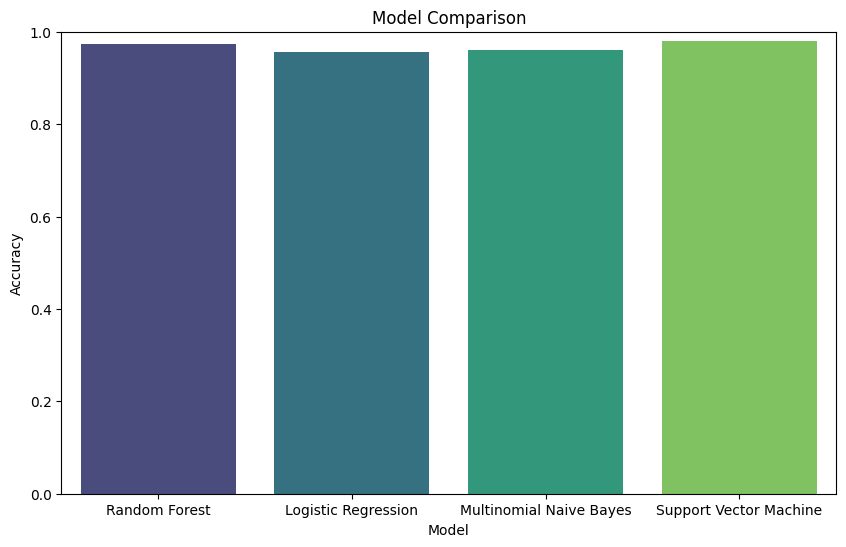

In [ ]:
# Create a bar plot to compare accuracies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=[name for name, _ in accuracies], y=[acc for _, acc in accuracies], palette="viridis")
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set y-axis limits to match accuracy range
plt.show()


**SVC** has the **highest accuracy**